In [12]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly

In [13]:
raw_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
raw_recovers = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
raw_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
raw_recovers.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,32852,32879,32977,33045,33058,33058,33064,33114,33118,33308
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,8675,8825,8965,9115,9215,9304,9406,9500,9585,9675
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,36578,36672,36763,36857,36958,37067,37170,37170,37382,37492
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1540,1615,1615,1715,1715,1814,1814,1814,1928,1928
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2577,2591,2598,2598,2635,2685,2716,2743,2744,2761


In [14]:
def undoCumSum(col):
    temp = pd.Series([0])
    for i in range(len(col[1:])):
        temp[i+1] = col[i+1] - col[i]
    return temp

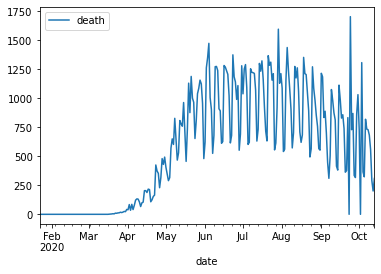

In [15]:
deaths = raw_deaths.loc[raw_deaths['Country/Region']=='Brazil'].drop(['Province/State','Lat','Long'],axis=1).melt(id_vars='Country/Region')
deaths = deaths.drop('Country/Region',axis=1)
deaths.columns=['date','death']
deaths['date'] = deaths['date'].map(pd.to_datetime)
deaths.death = deaths.apply(undoCumSum,axis=0).death
deaths.plot(x='date')
plt.show()

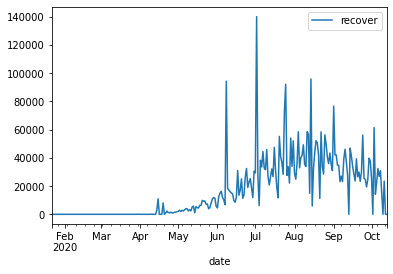

In [16]:
recovers = raw_recovers.loc[raw_recovers['Country/Region']=='Brazil'].drop(['Province/State','Lat','Long'],axis=1).melt(id_vars='Country/Region')
recovers = recovers.drop('Country/Region',axis=1)
recovers.columns=['date','recover']
recovers['date'] = recovers['date'].map(pd.to_datetime)
recovers.recover = recovers.apply(undoCumSum,axis=0).recover
recovers.plot(x='date')
plt.show()

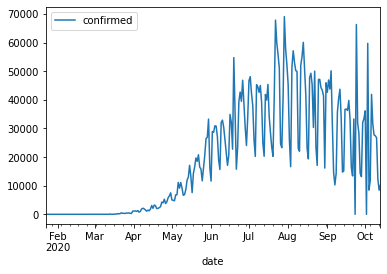

In [17]:
confirmeds = raw_confirmed.loc[raw_confirmed['Country/Region']=='Brazil'].drop(['Province/State','Lat','Long'],axis=1).melt(id_vars='Country/Region')
confirmeds = confirmeds.drop('Country/Region',axis=1)
confirmeds.columns=['date','confirmed']
confirmeds['date'] = confirmeds['date'].map(pd.to_datetime)
confirmeds.confirmed = confirmeds.apply(undoCumSum,axis=0).confirmed
confirmeds.plot(x='date')
plt.show()

In [18]:
data = pd.concat([deaths,recovers,confirmeds],axis=1)
data.columns = ['date', 'death', 'duplicated', 'recover', 'duplicated', 'confirm']
data = data.drop('duplicated',axis=1)
data = data.loc[data.date>='2020/02']
data.head()

,date,death,recover,confirm
10,2020-02-01,0,0,0
11,2020-02-02,0,0,0
12,2020-02-03,0,0,0
13,2020-02-04,0,0,0
14,2020-02-05,0,0,0


In [19]:
fig = px.bar(data,x='date',y=['death','confirm','recover'],
             color_discrete_sequence=['Crimson','Aqua','Lime'])
fig.update_layout(
    title={'text':"Casos de COVID-19 no Brasil",
           'x':0.5,'xanchor':'center'},
    xaxis_title="Data",
    yaxis_title="Número de casos",
    legend_title="",template = 'xgridoff')
fig.show()
fig.write_image("Todos.png",width=1000,height=600)

In [20]:
fig = px.bar(data,x='date',y=['death','confirm'],
             color_discrete_sequence=['Crimson','Aqua','Lime'])
fig.update_layout(
    title={'text':"Casos de COVID-19 no Brasil",
           'x':0.5,'xanchor':'center'},
    xaxis_title="Data",
    yaxis_title="Número de casos",
    legend_title="",template = 'xgridoff')
fig.show()
fig.write_image("Mortes_Confirmados.png",width=1000,height=600)

In [21]:
fig = px.bar(data,x='date',y=['death'],color_discrete_sequence=['Crimson'])
fig.add_shape(type='line',x0=pd.to_datetime('2020/02/26'),x1=pd.Timestamp.today(),y0=100,y1=100)
fig.add_trace(go.Scatter(x=[pd.to_datetime('2020/03/15')],y=[150],text='100 pessoas',mode='text',showlegend=False))
fig.update_layout(
    title={'text':"Casos de COVID-19 no Brasil",
           'x':0.5,'xanchor':'center'},
    xaxis_title="Data",
    yaxis_title="Número de casos",
    legend_title="",template = 'xgridoff')
fig.show()
fig.write_image("Mortes.png",width=1000,height=600)